In [2]:
import crantpy as cp
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cloudvolume as cv

In [3]:
os.getenv('CRANTTABLE_TOKEN')

'10331ac689913f85c62e9dcf4a410bcea0e87753'

In [4]:
cp.get_cave_client()

CAVEclient<datastack_name=kronauer_ant, server_address=https://proofreading.zetta.ai>

In [5]:
cp.get_cave_datastacks()

['kronauer_ant']

In [6]:
cp.get_cloudvolume()

In [7]:
df = cp.get_all_seatable_annotations(proofread_only=True)
df.head()

,root_id,root_id_processed,supervoxel_id,position,nucleus_id,nucleus_position,root_position,cave_table,proofread,status,...,cell_subtype,cell_instance,known_nt,known_nt_source,alternative_names,annotator_notes,user_annotator,user_proofreader,ngl_link,date_proofread
1,576460752688452399,None,74100212167609429,"32121, 31509, 1702",72621025497478503,"36772, 28974, 1953","36772, 28974, 1953",None,True,[BACKBONE_PROOFREAD],...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, mALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
4,576460752662526105,None,74100280887219649,"32484, 32119, 1756",72691394308791443,"37240, 29878, 2178","37240, 29878, 2178",None,True,[BACKBONE_PROOFREAD],...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, mALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
10,576460752730083020,None,73959818410466857,"30679, 36273, 2063",576460752663596169,"36555, 31429, 1131","31346, 36052, 1320",None,True,[BACKBONE_PROOFREAD],...,None,None,None,None,None,None,[lindsey_lopes],[antonio_bollig],https://spelunker.cave-explorer.org/#!middleau...,None
11,576460752673660716,None,74099800052193579,"32399, 25210, 2517",None,None,None,None,True,[BACKBONE_PROOFREAD],...,None,None,acetylcholine,"Tanaka et al., 2012 (immuno, lALT, drosophila ...",None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None
15,576460752678957397,None,74310974735406988,"34895, 26140, 1354",None,None,None,None,True,[BACKBONE_PROOFREAD],...,None,None,None,None,None,None,[lindsey_lopes],[lindsey_lopes],https://spelunker.cave-explorer.org/#!middleau...,None


In [8]:
def nm_to_voxel(coord_nm, vol):
    res = vol.info['scales'][0]['resolution']
    offset = vol.info['scales'][0]['voxel_offset']
    return [(int((c / r) - o)) for c, r, o in zip(coord_nm, res, offset)]

In [9]:
def plot_image(x, y, z, size=500, mip=0):
    if mip != 0:
        raise ValueError("Only mip level 0 is supported for plotting images.")
    em_url = "precomputed://gs://dkronauer-ant-001-alignment-final/aligned"
    vol = cv.CloudVolume(em_url, mip=mip, use_https=True)  # use_https is often needed for GCP buckets
    img = vol[x-size//2:x+size//2, y-size//2:y+size//2, z:z+1]
    img = img.squeeze()
    return img 

Decompressing: 100%|██████████| 1/1 [00:00<00:00, 969.11it/s]


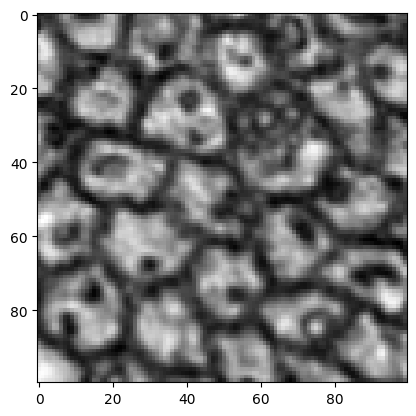

In [10]:
plt.imshow(plot_image(32889, 11632, 3221, size=100, mip=0), cmap='gray')

In [11]:
# Get a bunch of random neuron IDs for get_synapses 
pre_ids = df.sample(10, random_state=0)['root_id'].tolist()
pre_ids

['576460752705382484',
 '576460752661907178',
 '576460752680011891',
 '576460752741301887',
 '576460752728900966',
 '576460752644264934',
 '576460752677313029',
 '576460752723854502',
 '576460752762500094',
 '576460752728493639']

In [12]:
synapses = cp.get_synapses(pre_ids, post_ids=None)

In [13]:
synapses

,id,created,superceded_id,valid,size,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,pre_pt_position,post_pt_position,ctr_pt_position
0,35123170,2025-03-27 13:34:35.700037+00:00,NaN,t,104,73184662981829598,576460752728900966,73184662981826997,576460752668453896,"[154320, 161712, 138012]","[154480, 161840, 138012]","[154448, 161856, 138054]"
1,35123104,2025-03-27 13:34:35.700037+00:00,NaN,t,9,73184662981906584,576460752728900966,73184662981911726,576460752696016271,"[154128, 161376, 139230]","[154080, 161312, 139314]","[154128, 161296, 139314]"
2,35123092,2025-03-27 13:34:35.700037+00:00,NaN,t,5,73184662981909216,576460752728900966,73184662981914431,576460752696016271,"[154144, 161504, 139272]","[154032, 161600, 139398]","[154064, 161632, 139356]"
3,35123076,2025-03-27 13:34:35.700037+00:00,NaN,t,12,73184662981813540,576460752728900966,73184662981813566,576460752681730923,"[154096, 161408, 137760]","[153904, 161392, 137760]","[154000, 161376, 137718]"
4,35123087,2025-03-27 13:34:35.700037+00:00,NaN,t,191,73184662981885698,576460752728900966,73184662981893452,576460752428270216,"[153984, 161712, 138894]","[154112, 161792, 138936]","[154144, 161808, 138852]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1532,29611434,2025-03-27 13:34:35.700037+00:00,NaN,t,26,73114431877443543,576460752728900966,73114431877440659,576460752649764259,"[144768, 179696, 162540]","[144784, 179584, 162540]","[144816, 179568, 162456]"
1533,26730342,2025-03-27 13:34:35.700037+00:00,NaN,t,72,73114637566574532,576460752728900966,73114637566569396,576460752659224160,"[140768, 199088, 94626]","[140688, 198912, 94584]","[140752, 198960, 94668]"
1534,26730186,2025-03-27 13:34:35.700037+00:00,NaN,t,112,73114637566620888,576460752728900966,73114637566618165,576460752659224160,"[140448, 199696, 95382]","[140336, 199584, 95466]","[140400, 199632, 95550]"
1535,26730157,2025-03-27 13:34:35.700037+00:00,NaN,t,130,73114637566687394,576460752728900966,73114637566673969,576460752659224160,"[140224, 200000, 96516]","[140272, 199888, 96390]","[140400, 199952, 96474]"


In [14]:
# They’re in 1nm x 1nm x 1nm — it’s an issue I’ve been trying to sort out with zetta, 
# but to get them in the correct voxel format you need to divide the x and y by 8 (nm) and the y by 42 (nm)


def get_synapse_coordinates(synapse):
    x, y, z = synapse['ctr_pt_position']
    x = int(x//8)
    y = int(y//8)
    z = int(z//42)
    return x, y, z

Synapse ID: 35123170, Pre-root: 576460752728900966, Post-root: 576460752668453896, Size: 104


Decompressing: 100%|██████████| 2/2 [00:00<00:00, 835.69it/s]


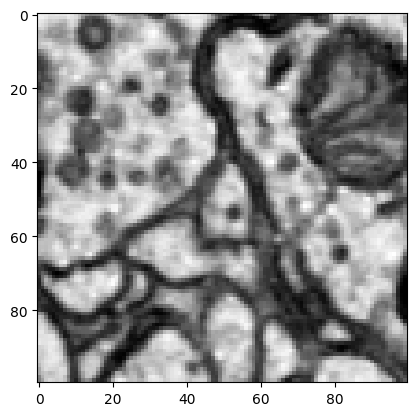

In [16]:
synapse = synapses.iloc[0]

pre_root = synapse['pre_pt_root_id'].astype(str)
post_root = synapse['post_pt_root_id'].astype(str)
synapse_id = synapse['id']
size = synapse['size']

print(f"Synapse ID: {synapse_id}, Pre-root: {pre_root}, Post-root: {post_root}, Size: {size}")

x, y, z = get_synapse_coordinates(synapse)

plt.imshow(plot_image(x, y, z, size=100, mip=0), cmap='gray')

Decompressing: 100%|██████████| 1/1 [00:00<00:00, 622.67it/s]


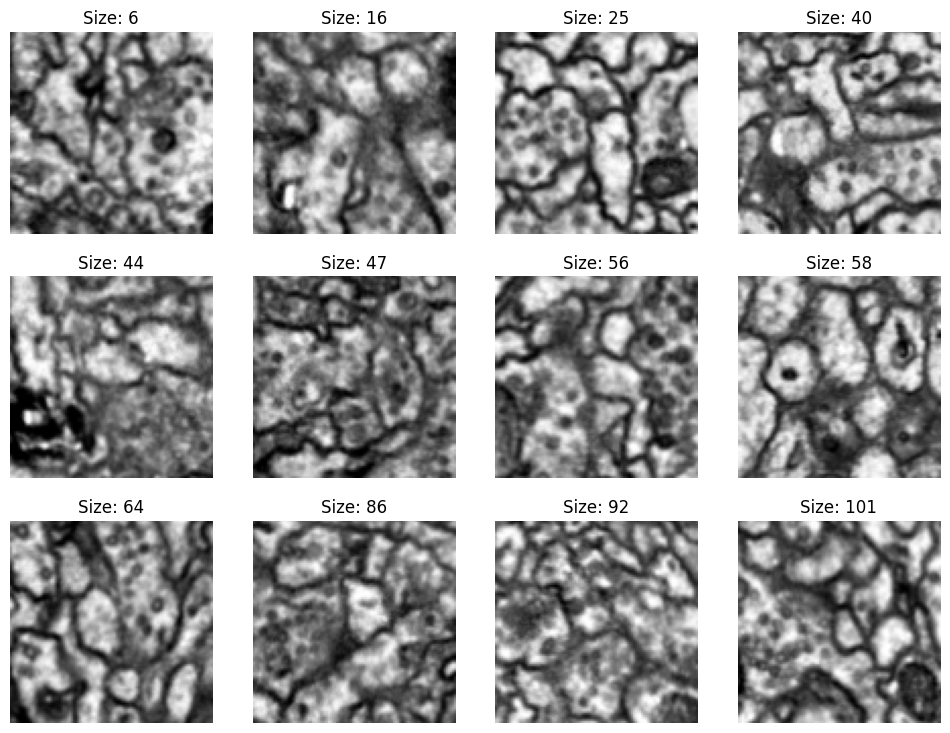

In [35]:
# Sample 12 synapses 

synapse_sample = synapses.sample(12, random_state=0).sort_values(by=['size']).reset_index(drop=True)

# Plot 3x4 grid of synapses 
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i, synapse in synapse_sample.iterrows():
    x, y, z = get_synapse_coordinates(synapse)
    ax = axs[i // 4, i % 4]
    ax.imshow(plot_image(x, y, z, size=100, mip=0), cmap='gray')
    ax.set_title(f"Size: {synapse['size']}")
    ax.axis('off')